In [1]:
from backtester import Backtester, run_backtests, generate_param_combinations, read_trader_log

from datamodel import Listing

In [2]:
def calculate_kelp_fair(order_depth):
    # assumes order_depth has orders in it 
    best_ask = min(order_depth.sell_orders.keys())
    best_bid = max(order_depth.buy_orders.keys())
    filtered_ask = [price for price in order_depth.sell_orders.keys() if abs(order_depth.sell_orders[price]) >= 15]
    filtered_bid = [price for price in order_depth.buy_orders.keys() if abs(order_depth.buy_orders[price]) >= 15]
    mm_ask = min(filtered_ask) if len(filtered_ask) > 0 else best_ask
    mm_bid = max(filtered_bid) if len(filtered_bid) > 0 else best_bid

    mmmid_price = (mm_ask + mm_bid) / 2
    return mmmid_price
    
def calculate_resin_fair(order_depth):
    return 10000

listings = {
    'RAINFOREST_RESIN': Listing(symbol='RAINFOREST_RESIN', product='RAINFOREST_RESIN', denomination='SEASHELLS'),
    'KELP': Listing(symbol='KELP', product='KELP', denomination='SEASHELLS')
}

position_limit = {
    'RAINFOREST_RESIN': 20,
    'KELP': 20
}

fair_calculations = {
    "RAINFOREST_RESIN": calculate_resin_fair,
    "KELP": calculate_kelp_fair
}


- trader v0: initial trader params from p2 that has not been changed with same reversion beta and everything
- trader v1: uses rolling mean instead of past prices to predict reversion?
- trader v2: linreg w updated proper reversion beta

In [9]:
# trader v0

from trader_v0 import Trader, Product

param_grid = {
    Product.RESIN: {
        "fair_value": [10000],
        "take_width": [1],
        "clear_width": [0],
        # for making
        "disregard_edge": [1],  # disregards orders for joining or pennying within this value from fair
        "join_edge": [2],  # joins orders within this edge
        "default_edge": [4],
        "soft_position_limit": [10],
    },
    Product.KELP: {
        "take_width": [1],
        "clear_width": [0],
        "prevent_adverse": [True],
        "adverse_volume": [15],
        "reversion_beta": [-0.229],
        "disregard_edge": [1],
        "join_edge": [0],
        "default_edge": [1],
    },
}

backtest_dir = "backtests/v0/"

trader v0

```
RAINFOREST_RESIN backtest pnl: 3010
{'fair_value': 10000, 'take_width': 1, 'clear_width': 0, 'disregard_edge': 1, 'join_edge': 2, 'default_edge': 4, 'soft_position_limit': 10}

KELP backtest pnl: 627.0
{'take_width': 1, 'clear_width': 0, 'prevent_adverse': True, 'adverse_volume': 15, 'reversion_beta': -0.229, 'disregard_edge': 1, 'join_edge': 0, 'default_edge': 1}

```

In [5]:
# trader v1
import trader_v1
from importlib import reload
reload(trader_v1)

Trader = trader_v1.Trader
Product = trader_v1.Product

param_grid = {
    Product.RESIN: {
        "fair_value": [10000],
        "take_width": [1],
        "clear_width": [0],
        # for making
        "disregard_edge": [1],  # disregards orders for joining or pennying within this value from fair
        "join_edge": [2],  # joins orders within this edge
        "default_edge": [4],
        "soft_position_limit": [10],
    },
    Product.KELP: {
        "take_width": [1],
        "clear_width": [0],
        "prevent_adverse": [True],
        "adverse_volume": [15],
        "disregard_edge": [1],
        "join_edge": [0],
        "default_edge": [1],
        'rolling_window_size': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    },
}

backtest_dir = "backtests/v1/"

simple rolling mean reversion
```
KELP PNL: 667.0
{'take_width': 1, 'clear_width': 0, 'prevent_adverse': True, 'adverse_volume': 15, 'disregard_edge': 1, 'join_edge': 0, 'default_edge': 1, 'rolling_window_size': 3}
KELP PNL: 655.0
{'take_width': 1, 'clear_width': 0, 'prevent_adverse': True, 'adverse_volume': 15, 'disregard_edge': 1, 'join_edge': 0, 'default_edge': 1, 'rolling_window_size': 4}

```

In [6]:
# trader v2
import trader_v2
reload(trader_v2)

Trader = trader_v2.Trader
Product = trader_v2.Product

param_grid = {
    Product.RESIN: {
        "fair_value": [10000],
        "take_width": [1],
        "clear_width": [0.5],
        "volume_limit": [0],
        # for making
        "disregard_edge": [1],  # disregards orders for joining or pennying within this value from fair
        "join_edge": [2],# joins orders within this edge 
        "default_edge": [4],
        'soft_position_limit': [10]
    },
    Product.KELP: {
        "take_width": [1],
        "clear_width": [0],
        "prevent_adverse": [True],
        "adverse_volume": [15],
        "reversion_beta": [-0.18172393033850867],
        "disregard_edge": [1],
        "join_edge": [0],
        "default_edge": [1],
    },
}

    # Product.KELP: {
    #     "take_width": [1, 2, 3],
    #     "clear_width": [-0.25, 0, 1],
    #     "prevent_adverse": [True],
    #     "adverse_volume": [15],
    #     'reversion_beta': [-0.18172393033850867],
    #     # for making
    #     "disregard_edge": [1],
    #     "join_edge": [3],
    #     "default_edge": [5],
    #     'soft_position_limit': [0]
    # },

backtest_dir = "backtests/v2/"

only changing reversion beta wout any other changes from v0
```
KELP PNL: 627.0
{'take_width': 1, 'clear_width': 0, 'prevent_adverse': True, 'adverse_volume': 15, 'reversion_beta': -0.18172393033850867, 'disregard_edge': 1, 'join_edge': 0, 'default_edge': 1}
```

In [7]:
# backtesting different execution parameters
reload(trader_v2)

Trader = trader_v2.Trader
Product = trader_v2.Product

param_grid = {
    Product.RESIN: {
        "fair_value": [10000],
        "take_width": [1],
        "clear_width": [0.5],
        "volume_limit": [0],
        # for making
        "disregard_edge": [1],  # disregards orders for joining or pennying within this value from fair
        "join_edge": [2],# joins orders within this edge 
        "default_edge": [4],
        'soft_position_limit': [10]
    },
    Product.KELP: {
        "take_width": [0, 1, 2, 3],
        "clear_width": [-0.25, 0, 1],
        "prevent_adverse": [True, False],
        "adverse_volume": [15],
        'reversion_beta': [-0.18172393033850867],
        # for making
        "disregard_edge": [1],
        "join_edge": [0],
        "default_edge": [1],
    },
}


backtest_dir = "backtests/executionParams/"

diff execution params:

```
KELP PNL: 688.0
{'take_width': 2, 'clear_width': 1, 'prevent_adverse': True, 'adverse_volume': 15, 'reversion_beta': -0.18172393033850867, 'disregard_edge': 1, 'join_edge': 0, 'default_edge': 1}
KELP PNL: 688.0
{'take_width': 2, 'clear_width': 1, 'prevent_adverse': False, 'adverse_volume': 15, 'reversion_beta': -0.18172393033850867, 'disregard_edge': 1, 'join_edge': 0, 'default_edge': 1}
KELP PNL: 688.0
{'take_width': 3, 'clear_width': 1, 'prevent_adverse': True, 'adverse_volume': 15, 'reversion_beta': -0.18172393033850867, 'disregard_edge': 1, 'join_edge': 0, 'default_edge': 1}
```

In [8]:
market_data, trade_history = read_trader_log('logs/empty_submission.log')

In [9]:
trader = Trader()

resin_results = run_backtests(trader, listings, position_limit, fair_calculations, market_data, trade_history, backtest_dir, param_grid, "RAINFOREST_RESIN")
resin_results.sort(key=lambda x: x[1], reverse=True)
print("RAINFOREST_RESIN results:")
for params, pnl in resin_results[:5]:
    print(f"RESIN PNL: {pnl}")
    print(params)

kelp_results = run_backtests(trader, listings, position_limit, fair_calculations, market_data, trade_history, backtest_dir, param_grid, "KELP")
kelp_results.sort(key=lambda x: x[1], reverse=True)
print("KELP results:")
for params, pnl in kelp_results[:5]: 
    print(f"KELP PNL: {pnl}")
    print(params)

Running backtests for RAINFOREST_RESIN: 100%|██████████| 1/1 [00:01<00:00,  1.06s/backtest]


RAINFOREST_RESIN results:
RESIN PNL: 3010
{'fair_value': 10000, 'take_width': 1, 'clear_width': 0.5, 'volume_limit': 0, 'disregard_edge': 1, 'join_edge': 2, 'default_edge': 4, 'soft_position_limit': 10}


Running backtests for KELP: 100%|██████████| 24/24 [00:18<00:00,  1.33backtest/s]

KELP results:
KELP PNL: 688.0
{'take_width': 2, 'clear_width': 1, 'prevent_adverse': True, 'adverse_volume': 15, 'reversion_beta': -0.18172393033850867, 'disregard_edge': 1, 'join_edge': 0, 'default_edge': 1}
KELP PNL: 688.0
{'take_width': 2, 'clear_width': 1, 'prevent_adverse': False, 'adverse_volume': 15, 'reversion_beta': -0.18172393033850867, 'disregard_edge': 1, 'join_edge': 0, 'default_edge': 1}
KELP PNL: 688.0
{'take_width': 3, 'clear_width': 1, 'prevent_adverse': True, 'adverse_volume': 15, 'reversion_beta': -0.18172393033850867, 'disregard_edge': 1, 'join_edge': 0, 'default_edge': 1}
KELP PNL: 688.0
{'take_width': 3, 'clear_width': 1, 'prevent_adverse': False, 'adverse_volume': 15, 'reversion_beta': -0.18172393033850867, 'disregard_edge': 1, 'join_edge': 0, 'default_edge': 1}
KELP PNL: 659.0
{'take_width': 2, 'clear_width': 0, 'prevent_adverse': True, 'adverse_volume': 15, 'reversion_beta': -0.18172393033850867, 'disregard_edge': 1, 'join_edge': 0, 'default_edge': 1}


In [10]:
kelp_results[-3:]

[({'take_width': 0,
   'clear_width': 0,
   'prevent_adverse': False,
   'adverse_volume': 15,
   'reversion_beta': -0.18172393033850867,
   'disregard_edge': 1,
   'join_edge': 0,
   'default_edge': 1},
  543.0),
 ({'take_width': 0,
   'clear_width': -0.25,
   'prevent_adverse': True,
   'adverse_volume': 15,
   'reversion_beta': -0.18172393033850867,
   'disregard_edge': 1,
   'join_edge': 0,
   'default_edge': 1},
  528.0),
 ({'take_width': 0,
   'clear_width': -0.25,
   'prevent_adverse': False,
   'adverse_volume': 15,
   'reversion_beta': -0.18172393033850867,
   'disregard_edge': 1,
   'join_edge': 0,
   'default_edge': 1},
  528.0)]

**So far rolling mean reversion has done better than all other strategies with same execution parameters!**

Reversion pnl 667 as opposed to both reversion strategies with pnl 627, slight coefficient change didn't do anything for improvement.

Definitely just have to optimize for execution parameters

Doesn't this indicate our model is messed up or MUCH more likely that our execution is SEVERELY MESSED UP?

In [28]:
# p9 code for trader
import trader_p9
Trader = trader_p9.Trader

backtest_dir = 'backtests/trader_p9.log'

trader = Trader()

backtester = Backtester(trader, listings, position_limit, fair_calculations, market_data, trade_history, backtest_dir)
backtester.run()

In [29]:
backtester.pnl

{'RAINFOREST_RESIN': 2220, 'KELP': 519.0}

In [11]:
params = {'take_width': 2, 'clear_width': 1, 'prevent_adverse': True, 'adverse_volume': 15, 'reversion_beta': -0.18172393033850867, 'disregard_edge': 1, 'join_edge': 0, 'default_edge': 1}


backtest_dir = 'backtests/executionParams'
symbol = 'KELP'
param_str = ";".join([f"{key}={value}" for key, value in params.items()])
log_filename = f"{backtest_dir}/{symbol}_{param_str}.log"


from parse_log import parse_log

sandbox, market, trades = parse_log(log_filename)


In [12]:
import pandas as pd
kelp_trades = trades[(trades['symbol'] == 'KELP') & ((trades['buyer'] == 'SUBMISSION') | (trades['seller'] == 'SUBMISSION'))]
kelp_trade_vol = pd.DataFrame()

kelp_trade_vol['timestamp'] = kelp_trades['timestamp']
kelp_trade_vol['quantity'] = kelp_trades['quantity'] * ((kelp_trades['buyer'] == 'SUBMISSION') * 2 - 1)
kelp_trade_vol['price'] = kelp_trades['price']

In [13]:
kelp_trades.groupby('timestamp').size()

timestamp
0         3
2400      1
3000      1
3100      1
3200      1
         ..
198800    1
198900    1
199000    1
199100    1
199400    1
Length: 460, dtype: int64

<Axes: xlabel='timestamp'>

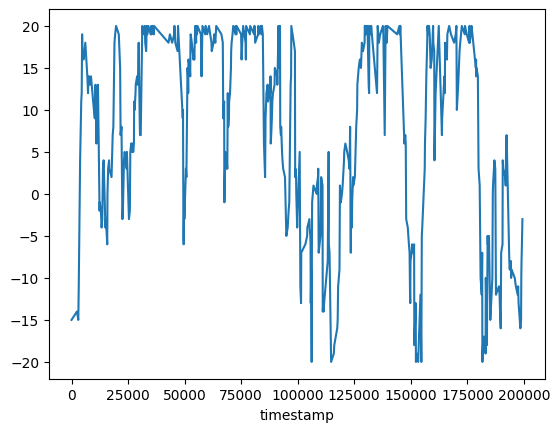

In [27]:
kelp_trade_vol.groupby('timestamp')['quantity'].sum().sort_index().cumsum().plot()

In [48]:
import plotly.express as px

kelp = market[market['product'] == 'KELP']
px.line(x=kelp['timestamp'], y=kelp['profit_and_loss'])